<a href="https://colab.research.google.com/github/mulcahrj/DATA6505_Final/blob/main/Final_Project_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python Final Project

DATA6505

**Professor**: Dr. Jie Tao

**Authors**: Ryan Mulcahey, Caroline Morrissey, Jonathan Luo

https://github.com/mulcahrj/DATA6505_Final

____________________________________________________________
# Spotify Top 200
Charting By week (Jan-2020 to Jul-2021)
____________________________________________________________


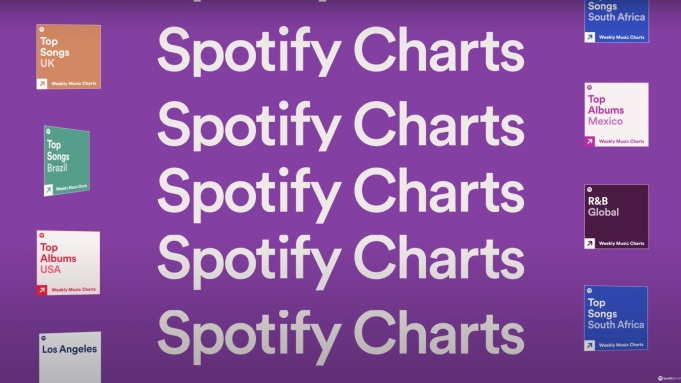

# Table of Contents

**Table of Contents**
1. Introduction
2. Data Dictionary
3. Getting the Data & Dataset Overview
4. Cleaning the Data
5. Creating New Columns
6. Exploring the Data
7. Conclusions & Lessons Learned

# 1. Introduction



1.   How long on average does it take for your song to break into top 200 on Spotify? 
2.   How about by looking at dancability, valence, chord, energy?
3.   Do high energy songs rise to the top 200 faster than lower energy songs?  Does dancability have an impact on how a song fares in the charts?  Do audiences prefer certain chords over others?



We are proposing a consulting service aimed at helping musicians crack the Spotify algorithm to maximize thier chances of reaching the top 200, and optimizing their revenue earned from streaming hit songs.  These are some of the questions we would like to know to understand what makes a successful song.

# 2. Data Dictionary & Glossary

## Data Dictionary


| Column | Data Type | Definition | 
| ------------ | ---------- | --- |
| Index | int64 | Key for each row |
| Highest Charting Position | int64 | Highest charted position in Spotify top 200
| Week of Highest Charting | int64 | Week of highest charting position in Spotify top 200
| Number of times Charted | int64 | How many weeks the song was in Spotify top 200 
| Song Name | object | Song name 
| Streams | int | Total number of global streams 
| Artist | object | Artist name 
| Artist Followings |int | Number of Spotify followers for artist 
| Song ID | object| Spotify unique song identifier 
| Genre | list | Genres tagged for artist 
| Release Date | object | Release date of song 
| Weeks Charted | object| The weeks the song was charted in Spotify top 200
|Popularity|int|Rank of the song, out of 200, for any given week
|Danceability | float | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
| Energy | float | Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
| Loudness | float | The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.
| Speechiness | float | Speechiness detects the presence of spoken words in a track.
| Acousticness | float | Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
|Liveness|float|Livliness of a song
| Tempo | float | The overall estimated tempo of a track in beats per minute (BPM).|
| Duration (ms) | int | Length of song in milliseconds
| Valence | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
| Chord | category | Indetifies the harmonic set of pitches/frequencies consisting of multiple notes of that track. 

## Glossary

**Pandas**: Open source software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

**Numpy**: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Matplotlib**: A plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

**Datetime**: The datetime module supplies classes for manipulating dates and times. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

**Calendar**: This module allows output calendars like the program and provides additional useful functions related to the calendar. Functions and classes defined in the Calendar module use an idealized calendar, the current Gregorian calendar extended indefinitely in both directions. 

# 3. Getting the Data & Dataset Overview

Once the data is loaded, we need to peek around and see if there are any issues that need to be addressed before we start doing analysis.

## Data Source

The data used in this project comes from:

Spotify Top 200 Charts (2020-2021)
 : https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021

## Loading the data
and Exploring what it has to offer

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pylab as plt
import datetime as dt
import calendar as cr
plt.style.use('fivethirtyeight')

spf_data = pd.read_csv("https://raw.githubusercontent.com/mulcahrj/DATA6505_Final/main/spotify_data.csv")

# Getting the shape of the dataset
spf_data.shape

(1556, 23)

## Overview of Dataset

In [2]:
# Getting a preview of the columns
spf_data.head(2)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db


In [3]:
# Odd that we find so many objects when in the preview above, there should be
# many columns that are either float or int
spf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [4]:
# Calculating percentage of null values.. something strange is going on
# as we see no nulls across the entire dataset, or we are extremely lucky (unlikely)

(spf_data.isnull().sum()/(spf_data.notnull().sum()+spf_data.isnull().sum())).round(4)*100

Index                        0.0
Highest Charting Position    0.0
Number of Times Charted      0.0
Week of Highest Charting     0.0
Song Name                    0.0
Streams                      0.0
Artist                       0.0
Artist Followers             0.0
Song ID                      0.0
Genre                        0.0
Release Date                 0.0
Weeks Charted                0.0
Popularity                   0.0
Danceability                 0.0
Energy                       0.0
Loudness                     0.0
Speechiness                  0.0
Acousticness                 0.0
Liveness                     0.0
Tempo                        0.0
Duration (ms)                0.0
Valence                      0.0
Chord                        0.0
dtype: float64

# 4. Cleaning the data
Clearing NAs, converting columns to integers and making the dataset usable for later analysis

## Clearing NAs

In [5]:
# Since we know there are some empty columns in index 36 song, we are looking
# at this title specifically to find out what's going on in one of these 
# empty-but-not-empty cells

i36_df = spf_data[spf_data['Index'] == 36]
i36_df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,,2021-07-23--2021-07-30,,,,,,,,,,,


In [6]:
# We find that 'genre' column seems empty, but find there is a str length of '1'

i36_df['Genre_ct'] = i36_df['Genre'].str.len()
i36_df[['Index','Song Name','Artist','Genre','Genre_ct']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Index,Song Name,Artist,Genre,Genre_ct
35,36,NOT SOBER (feat. Polo G & Stunna Gambino),The Kid LAROI,,1


In [7]:
# Checking the data type of 'Genre_ct' and find it's an object
# We will need to write a function to replace this with something else

i36_df[['Genre']].dtypes

Genre    object
dtype: object

In [8]:
# We see that Pandas data type object means string, so we will need to convert
# several columns to int/float.. but first is to sort out the cells with 
# a space in them instead of null.  Here we replace any cells with nothing to 
# NaN to handle them properly, first on the index=36 dataframe but will do this
# to the main dataset too

i36_df = i36_df.replace(r'^\s*$', np.nan, regex=True)
i36_df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Genre_ct
35,36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,NaN,NaN,NaN,NaN,2021-07-23--2021-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
# Once we replace empty cells with NaN in the full dataframe and re-check 
# for null values, we get this: a small percentage of rows without data, in
# this case, less than 1%.  Because it's such a small population, we will 
# remove these from analysis

spf_data_nan = spf_data.replace(r'^\s*$', np.nan, regex=True)

(spf_data_nan.isnull().sum()/(spf_data_nan.notnull().sum()+spf_data_nan.isnull().sum())).round(4)*100

Index                        0.00
Highest Charting Position    0.00
Number of Times Charted      0.00
Week of Highest Charting     0.00
Song Name                    0.00
Streams                      0.00
Artist                       0.00
Artist Followers             0.71
Song ID                      0.71
Genre                        0.71
Release Date                 0.71
Weeks Charted                0.00
Popularity                   0.71
Danceability                 0.71
Energy                       0.71
Loudness                     0.71
Speechiness                  0.71
Acousticness                 0.71
Liveness                     0.71
Tempo                        0.71
Duration (ms)                0.71
Valence                      0.71
Chord                        0.71
dtype: float64

In [10]:
# We drop any rows with NaN values in them, and test this correctly
# included row 36, which it does.

spf_data_nan = spf_data_nan.dropna()
spf_data_nan[spf_data_nan['Index'] == 36]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


In [11]:
# One last check, confirming we have 0 null counts for the 
# spf_data_nan dataframe

spf_data_nan.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

## Removing incorrectly filled Release Date songs

In [12]:
# Removing songs with date fields that has misformatted date fields for release date

date_anomalies = ['1962','1963','1981','1990','1994','1995','2002','2012','2014','2015','2016','1957-09']

spf_data_nan = spf_data_nan[~spf_data_nan['Release Date'].isin(date_anomalies)]

In [13]:
# Checking those misformatted date field songs are no longer in the dataset

date_anomalies = ['1962','1963','1981','1990','1994','1995','2002','2012','2014','2015','2016','1957-09']
filter_date_an = spf_data_nan['Release Date'].isin(date_anomalies)
spf_data_nan[filter_date_an]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


## Removing extraneous characters
from a few columns to make them more usable in caclulations and charting

In [14]:
# Remove commas in stream to convert to int
# and remove apostrophes in Genre to split/turn into list elements

spf_data_nan.replace({'Streams':{',':''}}, regex=True, inplace=True)
spf_data_nan['Genre'].replace('\'','', regex=True, inplace=True) 
spf_data_nan.head(5)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[indie rock italiano, italian pop]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,[australian hip hop],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,[pop],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"[pop, uk pop]",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"[lgbtq+ hip hop, pop rap]",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [15]:
#Converting columns to the 'correct' data type

spf_data_nan.astype({'Streams':'int32','Artist Followers': 'int32',
                     'Popularity':'int32','Danceability': 'float32',
                     'Energy': 'float32','Loudness': 'float32',
                     'Speechiness': 'float32','Acousticness': 'float32',
                     'Liveness': 'float32','Tempo': 'float32',
                     'Duration (ms)':'int32','Valence': 'float32',
                     'Chord': 'category'}).dtypes

Index                           int64
Highest Charting Position       int64
Number of Times Charted         int64
Week of Highest Charting       object
Song Name                      object
Streams                         int32
Artist                         object
Artist Followers                int32
Song ID                        object
Genre                          object
Release Date                   object
Weeks Charted                  object
Popularity                      int32
Danceability                  float32
Energy                        float32
Loudness                      float32
Speechiness                   float32
Acousticness                  float32
Liveness                      float32
Tempo                         float32
Duration (ms)                   int32
Valence                       float32
Chord                        category
dtype: object

## Manually cleaning some genre columns

In [16]:
# Cleaning the Genre column, had to hard code some instances to correct here where
# code didn't catch

spf_data_artgen = spf_data_nan.groupby('Artist')['Genre'].unique().apply(' '.join).reset_index()

spf_data_artgen['Genre'] = spf_data_artgen['Genre'].str.strip('[]')

spf_data_artgen['Genre'].apply(lambda x: x.replace('','').replace(']',''))

correct = ["A Boogie Wit da Hoodie","Ava Max","Billie Eilish","Coldplay","Dua Lipa","Ed Sheeran",
           "J Balvin","Jack Harlow","Justin Bieber","Lady Gaga","Luísa Sonza","Nat King Cole",
           "Playboi Carti","Selena Gomez","Shawn Mendes","Tones And I",'Travis Scott','NLE Choppa']

spf_data_artgen.loc[(spf_data_artgen.Artist == "A Boogie Wit da Hoodie"), 'Genre'] = 'melodic rap, pop rap, rap, trap'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Ava Max"), 'Genre'] = 'dance pop, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Billie Eilish"), 'Genre'] = 'electropop, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Coldplay"), 'Genre'] = 'permanent wave, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Dua Lipa"), 'Genre'] = 'dance pop, pop, uk pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Ed Sheeran"), 'Genre'] = 'pop, uk pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "J Balvin"), 'Genre'] = 'latin, reggaeton, reggaeton colombiano'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Jack Harlow"), 'Genre'] = 'deep underground hip hop, kentucky hip hop, pop rap, rap, canadian hip hop, canadian trap, melodic rap, pop rap, r&b, rap, toronto rap, trap'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Justin Bieber"), 'Genre'] = 'canadian pop, pop, post-teen pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Lady Gaga"), 'Genre'] = 'dance pop, pop, post-teen pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Luísa Sonza"), 'Genre'] = 'funk carioca, pop nacional'
spf_data_artgen.loc[(spf_data_artgen.Artist == "NLE Choppa"), 'Genre'] = 'melodic rap, rap, trap, memphis hip hop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Nat King Cole"), 'Genre'] = 'adult standards, lounge, soul, vocal jazz'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Playboi Carti"), 'Genre'] = 'atl hip hop, plugg, rap, trap'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Selena Gomez"), 'Genre'] = 'dance pop, pop, post-teen pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Shawn Mendes"), 'Genre'] = 'canadian pop, dance pop, pop, post-teen pop, viral pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Tones And I"), 'Genre'] = 'australian pop, pop'
spf_data_artgen.loc[(spf_data_artgen.Artist == "Travis Scott"), 'Genre'] = 'rap, slap house, rap, trap'

filter = spf_data_artgen['Artist'].isin(correct)

# Verifying the manual adjustments worked
spf_data_artgen[filter]

,Artist,Genre
8,A Boogie Wit da Hoodie,"melodic rap, pop rap, rap, trap"
42,Ava Max,"dance pop, pop"
90,Billie Eilish,"electropop, pop"
150,Coldplay,"permanent wave, pop"
193,Dua Lipa,"dance pop, pop, uk pop"
198,Ed Sheeran,"pop, uk pop"
257,J Balvin,"latin, reggaeton, reggaeton colombiano"
273,Jack Harlow,"deep underground hip hop, kentucky hip hop, po..."
310,Justin Bieber,"canadian pop, pop, post-teen pop"
360,Lady Gaga,"dance pop, pop, post-teen pop"


## Cleaned up dataset

In [17]:
# Merging the cleaned genre back into main dataframe
spf_clean = spf_data_nan.merge(spf_data_artgen, on='Artist', how='left')

# Compiling final Genre column and filling N/As with empty cells
spf_clean['Genre'] = spf_clean['Genre_y'].fillna("")

# Dropping the original columns from the merge
spf_clean = spf_clean.drop(['Genre_x','Genre_y'], axis = 1)

spf_clean.head(2)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Genre
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,"indie rock italiano, italian pop"
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,australian hip hop


In [18]:
# Splitting Genre into lists of strings

spf_clean['Genre'] = spf_clean.Genre.apply(lambda x: x.split(','))
spf_clean.head(2)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Genre
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,"[indie rock italiano, italian pop]"
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,[australian hip hop]


In [19]:
pop_filter = spf_clean[spf_clean.Genre.apply(lambda x: 'pop' in x)]
pop_filter.head(2)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Genre
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,[pop]
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,"[pop, uk pop]"


In [20]:
# Checking all data types after calcs and conversions
spf_clean.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
Genre                        object
dtype: object

# 5. Creating New Columns


## Date Columns

In [21]:
# Convert release date to datetime format for later calculations
spf_clean['Release Date'] = pd.to_datetime(spf_clean['Release Date'])

spf_clean['Release Date'] = pd.to_datetime(spf_clean['Release Date'])

# Splitting column into 2 to show the week start day and week end day
spf_clean['Week of Highest Charting'].str.split('--', n=1, expand=True)

# Creeates the 2 new columns from 'Week of highest Charting'
spf_clean[['Start_Highest_Charting','End_Highest_Charting']] = spf_clean['Week of Highest Charting'].str.split('--', n=1, expand=True)

# Converting the dates to time for time calculations
spf_clean['Start_Highest_Charting'] = pd.to_datetime(spf_clean['Start_Highest_Charting'])

# Converting to datetime using datetime library
spf_clean['End_Highest_Charting'] = pd.to_datetime(spf_clean['End_Highest_Charting'])

# Calc time to highest charting and convert to int
spf_clean['Start_to_Highest'] = (spf_clean['End_Highest_Charting'] - spf_clean['Release Date']).dt.days
spf_clean['Start_to_Highest'].astype(int)

0       1330
1         21
2         42
3         14
4          7
        ... 
1523     945
1524      84
1525     721
1526     100
1527      51
Name: Start_to_Highest, Length: 1528, dtype: int64

In [22]:
# Split to find earliest charting by taking first 10 characters of 'Weeks Charted'
# column to get the earliest charted week in YYYY-MM-DD format
spf_clean['Earliest Charting'] = spf_clean['Weeks Charted'].str[-10:]

# ...and convert to datetime
spf_clean['Earliest Charting'] = pd.to_datetime(spf_clean['Earliest Charting'])

In [23]:
# Calculating new column to be the difference of earliest charting date from release date
# and checking output
spf_clean['Start_to_Earliest'] = (spf_clean['Earliest Charting'] - spf_clean['Release Date']).dt.days

# Verifying days start_to_earliest calc look correct in the column
spf_clean[['Start_to_Earliest','Earliest Charting','Release Date']]

,Start_to_Earliest,Earliest Charting,Release Date
0,1281,2021-06-11,2017-12-08
1,7,2021-07-16,2021-07-09
2,0,2021-05-21,2021-05-21
3,7,2021-07-02,2021-06-25
4,7,2021-07-30,2021-07-23
...,...,...,...
1523,945,2020-01-03,2017-06-02
1524,84,2020-01-03,2019-10-11
1525,721,2020-01-03,2018-01-12
1526,100,2020-01-03,2019-09-25


# 6. Exploring the Data

## Highest Charted Position

In [24]:
# Creating bins for highest chared position
bins = [0, 3, 10, 25, 50, 100, 200]
spf_clean['Highest_Charted_binned'] = pd.cut(spf_clean['Highest Charting Position'], bins)

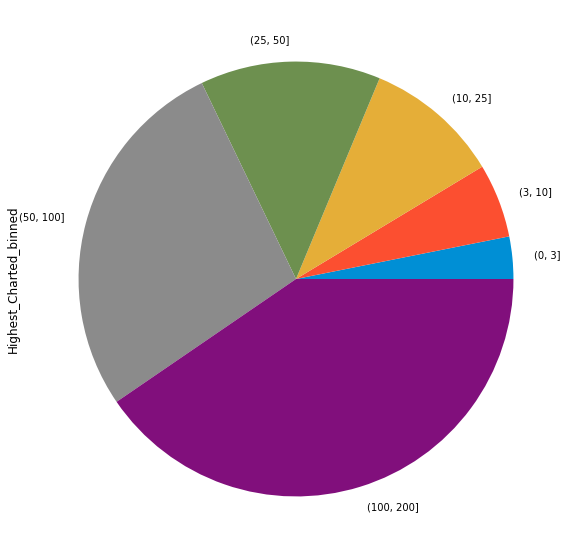

In [25]:
# Pie chart to visualize share of each bin in total

pie1 = spf_clean.Highest_Charted_binned.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

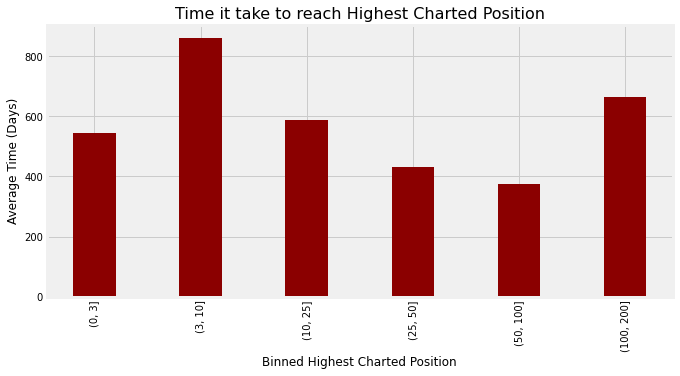

In [26]:
# Charting highest charted binned against mean of the average days from release to highest charting position in days

plot1 = spf_clean.groupby('Highest_Charted_binned').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot1.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot1.set_xlabel('Binned Highest Charted Position',fontsize=12)
plot1.set_ylabel('Average Time (Days)',fontsize=12)
plot1.get_legend().remove()
plt.show()

## Speechiness

How much do the general amounts of words in a song impact the chartibility of a song?

Here, we binned this metric by groups of 0-0.125, 0.125-0.25, 0.25-0.375, and 0.375-1.  The last bin is inclusive of a wide range in this metric due to lack of data points, leading to difficult to read visualization.

In [27]:
# Converting Speechiness into float to bin/chart

spf_clean['Speechiness'] = spf_clean['Speechiness'].astype(float)

In [28]:
# Binning Speechiness

Speech_bins = [0, 0.125, 0.25, 0.375, 1]
spf_clean['Speech_binned'] = pd.cut(spf_clean['Speechiness'], Speech_bins)

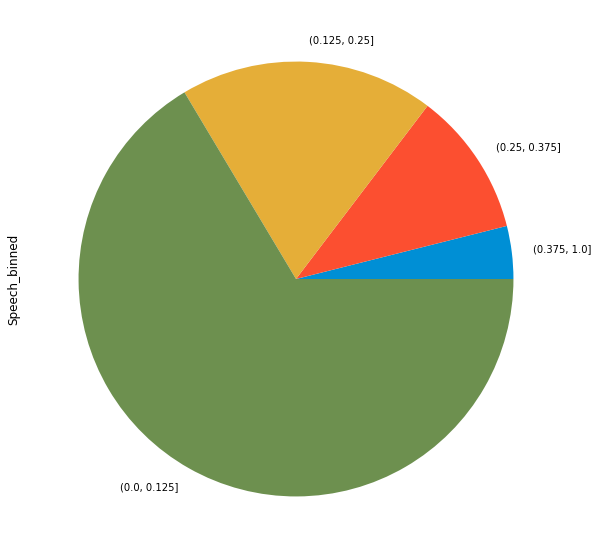

In [29]:
# Pie chart to show overall share of each bin on speechiness

pie1 = spf_clean.Speech_binned.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

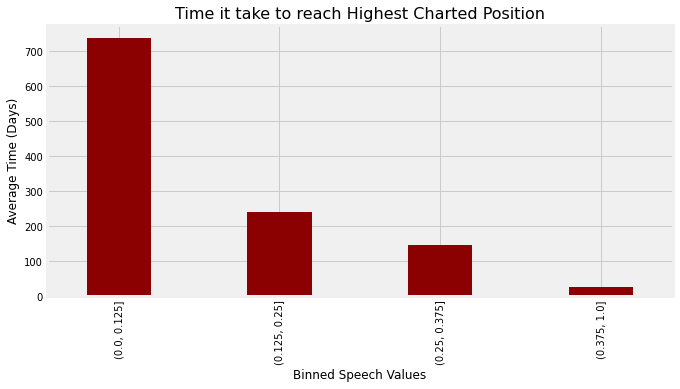

In [30]:
# Bar chart to visualize the average time to reach highest charted position in days

plot2 = spf_clean.groupby('Speech_binned').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot2.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot2.set_xlabel('Binned Speech Values',fontsize=12)
plot2.set_ylabel('Average Time (Days)',fontsize=12)
plot2.get_legend().remove()
plt.show()

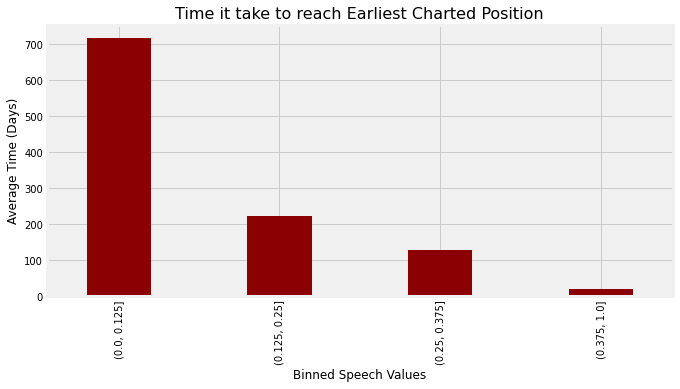

In [31]:
# Similar to above, but to earliest charted date instead of highest charted date

plot3 = spf_clean.groupby('Speech_binned').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot3.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot3.set_xlabel('Binned Speech Values',fontsize=12)
plot3.set_ylabel('Average Time (Days)',fontsize=12)
plot3.get_legend().remove()
plt.show()

We find that across the data anlysis, the data tell us that the time from release date to either earliest charting date or highest charting date are nearly identical.  We are not sure if this is an issue with the data or that most songs peak in the same week they show up in the Top 200 charts.

## Energy

Energy is representative of a perceptual measure of intensity and activity.  Typically, energetic tracks are fast, loud, and noisy or complex.  

We try to find trends with how 'energetic' a song is against how long it takes to reach Spotify top 200.

In [32]:
# Converting Energy to float for binning/charting

spf_clean['Energy'] = spf_clean['Energy'].astype(float)

In [33]:
# Binning Energy

energy_bins = [0, 0.375, 0.5, 0.625, 0.75, 0.875,1]
spf_clean['energy_bins'] = pd.cut(spf_clean['Energy'], energy_bins)

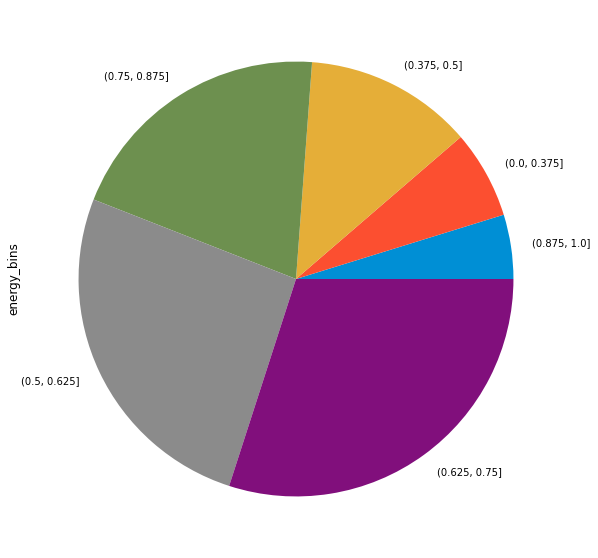

In [34]:
# Pie chart to show energy bins as share of total

pie1 = spf_clean.energy_bins.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

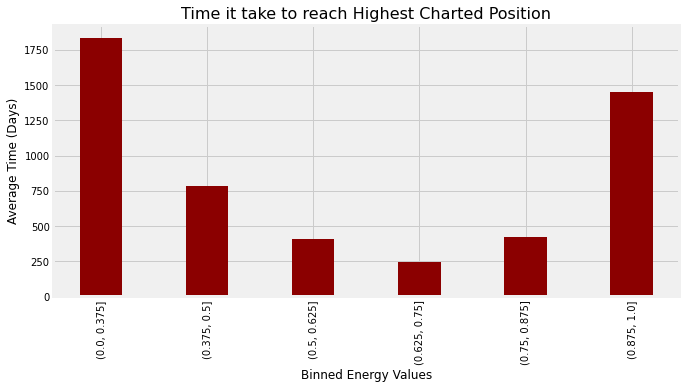

In [35]:
# Bar chart showing energy bins comparatively

plot4 = spf_clean.groupby('energy_bins').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot4.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot4.set_xlabel('Binned Energy Values',fontsize=12)
plot4.set_ylabel('Average Time (Days)',fontsize=12)
plot4.get_legend().remove()
plt.show()

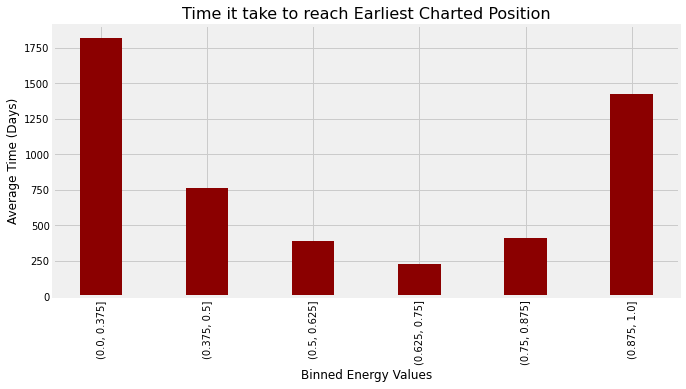

In [36]:
# Bar chart showing energy bins comparatively

plot5 = spf_clean.groupby('energy_bins').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot5.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot5.set_xlabel('Binned Energy Values',fontsize=12)
plot5.set_ylabel('Average Time (Days)',fontsize=12)
plot5.get_legend().remove()
plt.show()

Similar to Speechiness, our calculations to show from release date to either earliest date on charts or date of highest chart position are showing no difference.  

However, we do see that trends of extremes on either side of energy - either low enery, or very high energy - does not bode well for a song reaching the top 200.

The sweet spots range from 0.5 to 0.875 in 'Energy' rating.

## Valence

Valence describes the musical positivity conveyed by a song to the listener.  In this measure, a song can convey emotion to the listener and this is how Spotify attempts to quantify that.

We assume this means the overall feel of a song, and not explicity just the lyrics.  While there are examples of songs that have an energetic beat and convey positive tones, the lyrics contradict that and tell a negative story.

In [37]:
# Converting Valence to float

spf_clean['Valence'] = spf_clean['Valence'].astype(float)

In [38]:
# Creating bins for Valence

valance_bins = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875,1]
spf_clean['valance_bins'] = pd.cut(spf_clean['Valence'], energy_bins)

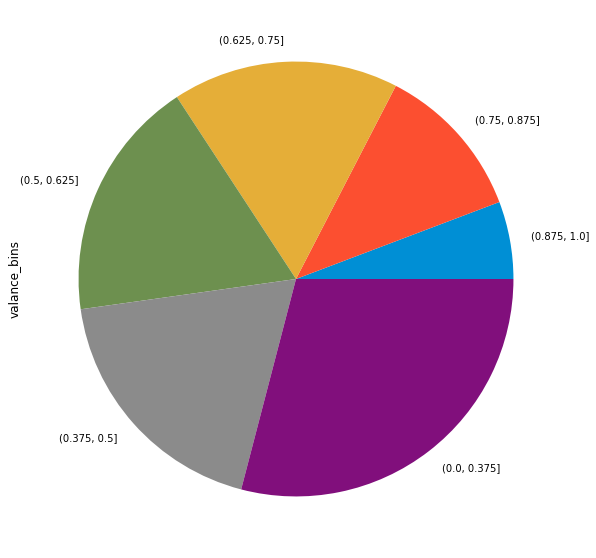

In [39]:
# Pie chart to show share of bins for Valence against others

pie1 = spf_clean.valance_bins.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

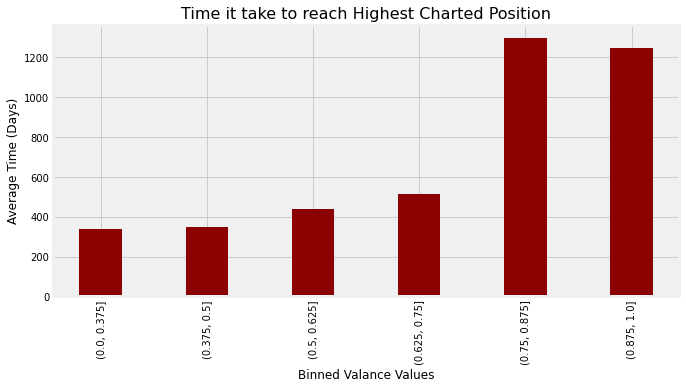

In [40]:
# Column chart to show bins of Valence against avg time to reach chart position

plot6 = spf_clean.groupby('valance_bins').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot6.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot6.set_xlabel('Binned Valance Values',fontsize=12)
plot6.set_ylabel('Average Time (Days)',fontsize=12)
plot6.get_legend().remove()
plt.show()

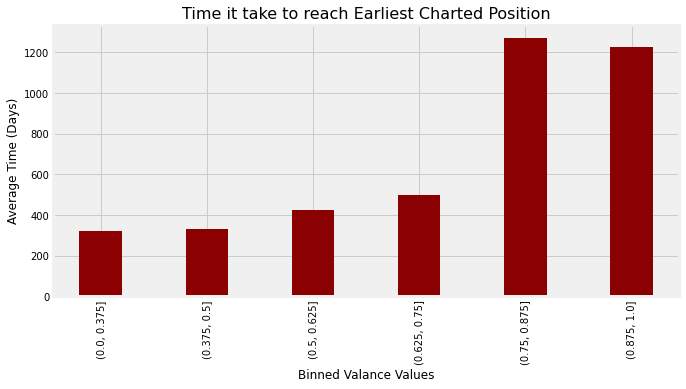

In [41]:
# Column chart to show bins of Valence against avg time to reach chart position

plot7 = spf_clean.groupby('valance_bins').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot7.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot7.set_xlabel('Binned Valance Values',fontsize=12)
plot7.set_ylabel('Average Time (Days)',fontsize=12)
plot7.get_legend().remove()
plt.show()

Similar to the prior sections, we are looking at the average time to chart showing no difference between the two measures.

However, we can clearly see that Valence measures above 0.75 will dramatically impact the song's chart chances in a negative way.  Further analysis could be done here to understand further breakdowns of these bins.

## Danceability 

In [42]:
# Converting Danceability to float for binning

spf_clean['Danceability'] = spf_clean['Danceability'].astype(float)

In [43]:
# Binning danceability

Danceability_bins = [0, 0.5, 0.625, 0.75, 0.875,1]
spf_clean['Danceability_bins'] = pd.cut(spf_clean['Danceability'], Danceability_bins)

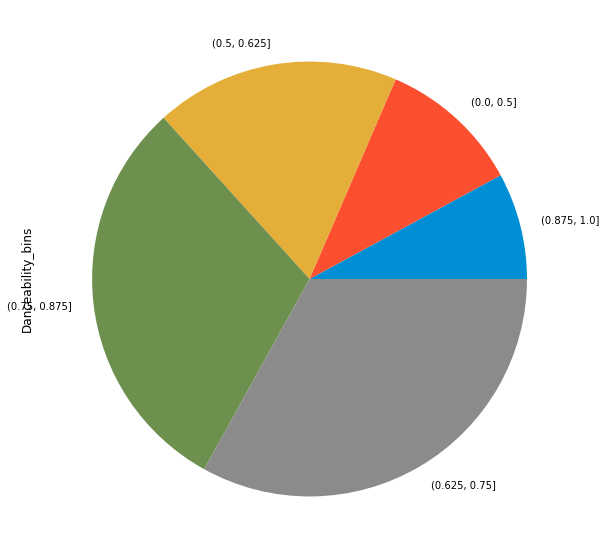

In [44]:
# Charting danceability using similar measures as above

pie1 = spf_clean.Danceability_bins.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

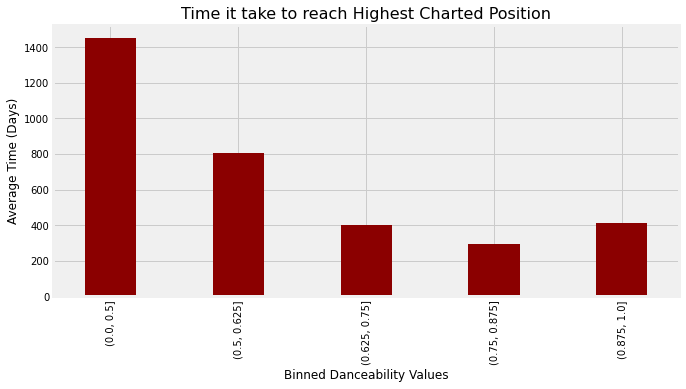

In [45]:
# Bar chart of danceability

plot8 = spf_clean.groupby('Danceability_bins').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot8.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot8.set_xlabel('Binned Danceability Values',fontsize=12)
plot8.set_ylabel('Average Time (Days)',fontsize=12)
plot8.get_legend().remove()
plt.show()

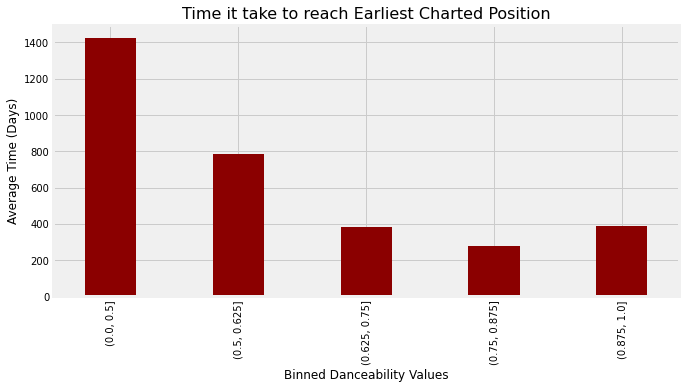

In [46]:
# Bar chart of danceability (earliest chart position)

plot9 = spf_clean.groupby('Danceability_bins').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot9.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot9.set_xlabel('Binned Danceability Values',fontsize=12)
plot9.set_ylabel('Average Time (Days)',fontsize=12)
plot9.get_legend().remove()
plt.show()

Similar results to above with regards to either highest chart position date or earliest chart date, but other trends emerge.

We find that Danceability of 0.625 through 1.0 are favored by audiences with quicker charting vs release date. Intuitively this makes sense to us because a catchier song will be more popular.

This would be interesting to see over time, pre-COVID to post-COVID and the differences in venue on consumption (bars/clubs pre-COVID, and potentially cars or in your home during COVID).

## Chord

Chord is the key the song is written in, and the notes the song is centered around.  Some chords naturally sound better to the human ear, and different genres can have different chord progressions.  This can impact how widely a song becomes popular, how it sparks emotion, and how a song is perceived.

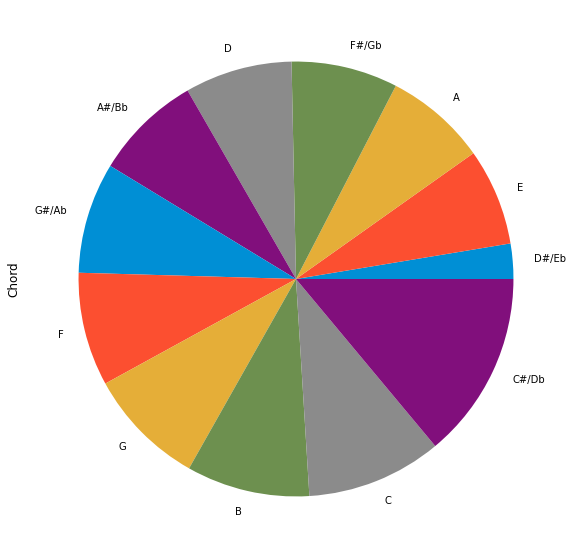

In [47]:
# Charting chord distribution

pie1 = spf_clean.Chord.value_counts().sort_values().plot(kind = 'pie',figsize=(10,10))
plt.show()

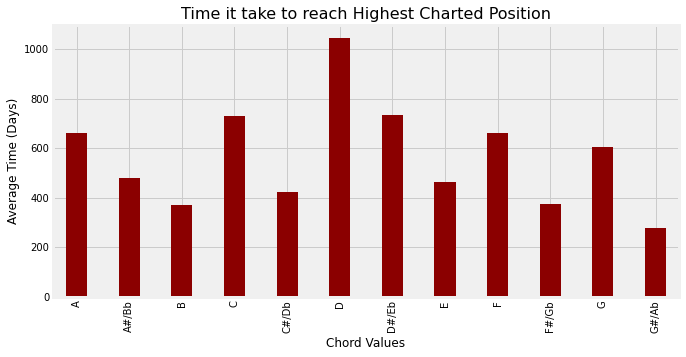

In [48]:
# Creating column chart to more directly compare chords against time it takes to highest chart position

plot11 = spf_clean.groupby('Chord').agg({'Start_to_Highest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot11.set_title('Time it take to reach Highest Charted Position',fontsize=16)
plot11.set_xlabel('Chord Values',fontsize=12)
plot11.set_ylabel('Average Time (Days)',fontsize=12)
plot11.get_legend().remove()
plt.show()

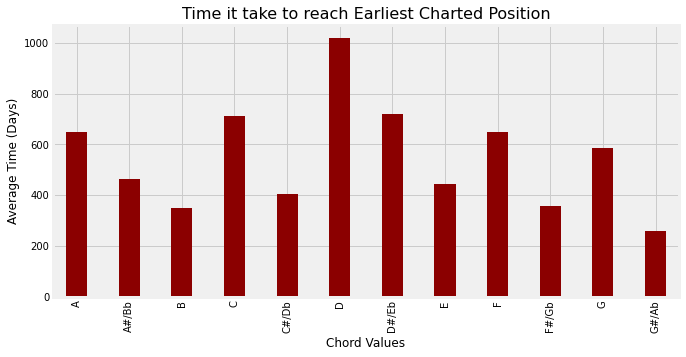

In [49]:
# Creating column chart to more directly compare chords against time it takes to earliest chart position date

plot11 = spf_clean.groupby('Chord').agg({'Start_to_Earliest':[np.mean]}).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
plot11.set_title('Time it take to reach Earliest Charted Position',fontsize=16)
plot11.set_xlabel('Chord Values',fontsize=12)
plot11.set_ylabel('Average Time (Days)',fontsize=12)
plot11.get_legend().remove()
plt.show()

Most chords in the data are evenly respresented by the count of songs, with C sharp/D flat being represnted more than other songs in the data, and D sharp/E flat being represented less than other songs overall.

Against time to charting positions, chord G sharp/A flat has the shortest duration from release date to date of charting position, with a few others trailing closely.  Chord D stands out as having the longest time to a charting position in Spotify top 200.

It would be interesting to dig further and look at genres, artists, and more.

## Looking at Longevity

Does the valence, energy, and speechiness have an effect on how long a song is on the Top 200?

Here we look at how these metrics impact or highlight the staying power of  asong in Spotify's top 200 songs.



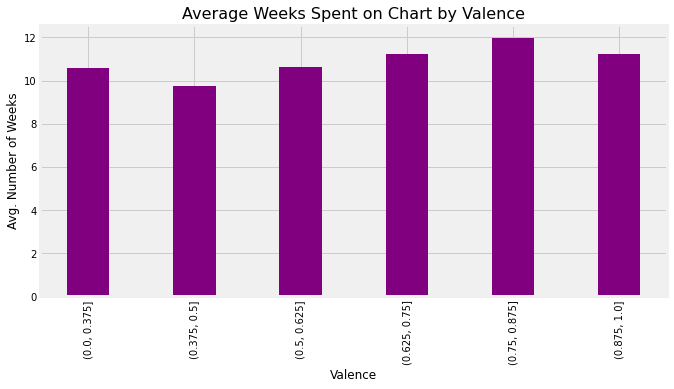

In [50]:
# Valence

chart4 = spf_clean.groupby('valance_bins').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'purple', figsize=(10,5))
chart4.set_title('Average Weeks Spent on Chart by Valence',fontsize=16)
chart4.set_xlabel('Valence',fontsize=12)
chart4.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart4.get_legend().remove()
plt.show()

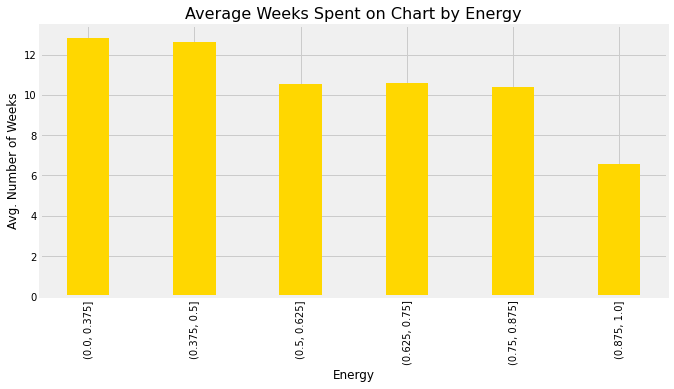

In [51]:
# Energy

chart3 = spf_clean.groupby('energy_bins').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'gold', figsize=(10,5))
chart3.set_title('Average Weeks Spent on Chart by Energy',fontsize=16)
chart3.set_xlabel('Energy',fontsize=12)
chart3.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart3.get_legend().remove()
plt.show()

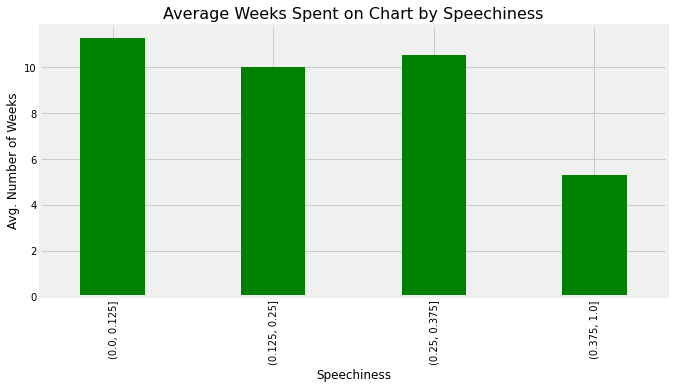

In [52]:
# Speechiness

chart1 = spf_clean.groupby('Speech_binned').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'green', figsize=(10,5))
chart1.set_title('Average Weeks Spent on Chart by Speechiness',fontsize=16)
chart1.set_xlabel('Speechiness',fontsize=12)
chart1.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart1.get_legend().remove()
plt.show()

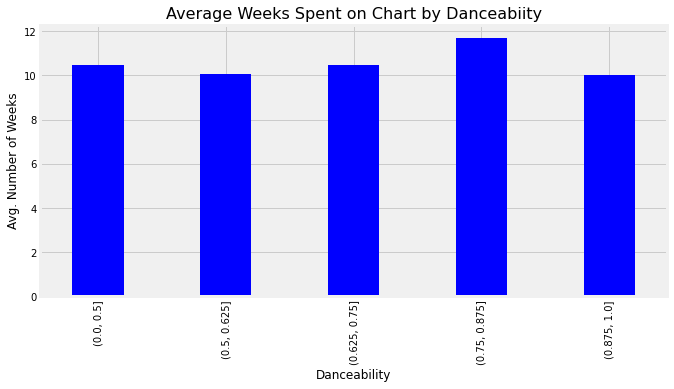

In [53]:
# Danceability

chart2 = spf_clean.groupby('Danceability_bins').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'blue', figsize=(10,5))
chart2.set_title('Average Weeks Spent on Chart by Danceabiity',fontsize=16)
chart2.set_xlabel('Danceability',fontsize=12)
chart2.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart2.get_legend().remove()
plt.show()

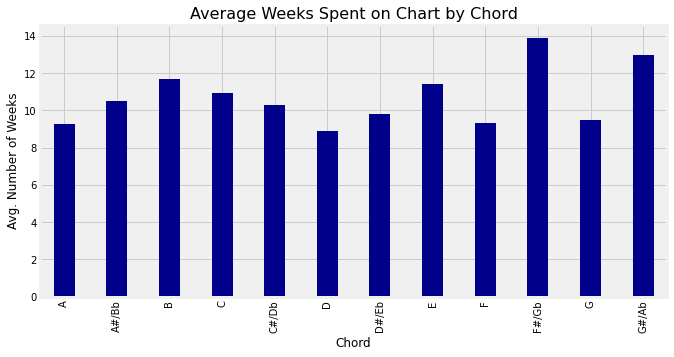

In [54]:
# Chord

chart5 = spf_clean.groupby('Chord').agg({'Number of Times Charted':[np.mean]}).plot.bar(width = .4, color = 'darkblue', figsize=(10,5))
chart5.set_title('Average Weeks Spent on Chart by Chord',fontsize=16)
chart5.set_xlabel('Chord',fontsize=12)
chart5.set_ylabel('Avg. Number of Weeks',fontsize=12)
chart5.get_legend().remove()
plt.show()

We find that while variations in danceability and valence have little impact on staying power of a song in Spotify top 200, energy, speechiness, and chord all show wide margins where certain values have higher or lower staying power.

**Chord**: Songs in chord of F sharp/G flat stay in the top 200 for about 14 weeks, where songs in chord of A, D or F average about 9 weeks.

**Speechiness**: Given we saw in the speechiness pie chart that the largest count was in the 0.375-1.0 bin, and the staying power of these songs is significantly lower, we can say that most songs have too many spoken words in the track.  Lowering the amount of words in a track can be directly related to having a song in the top 200 for a longer time.

**Energy**: The higher energy a song is, the less amount of time it spends in Spofy's top 200 songs.  Given that most songs fall between 0.5 and 0.875 in this metric, there may simply be a lot of comeptition at these energy leves.  Further analysis would be needed.

# 7. Conclusions & Lessons Learned
_____________________________________________________
**Q**: *How long on average does it take for your song to break into top 200 on Spotify?*

**A**: It depends.  There are no shortage of variables that may determine how quick or slow your song takes to break into Spotify's top 200, if it ever does.  This data only explores those songs that ***do*** break into the top 200, and will contain survivorship bias in any analysis done.
_____________________________________________________

**Q**: *How about by looking at dancability, valence, chord, energy?*

**A**: Given above, we find some trends in each of these variables but are hard to make solid conclusions about each.  Should your song be high energy but low speechiness?  What kinds of combinations could yield the optimum chances of staying in Spotify's top 200? 
______________________________________________________

**General conclusions**: In general, we find a some patterns in the data that reflect how a popular song can make it to the top 200 quicker and stay longer, but further analysis is needed. This is an interesting topic, and maybe something one of us can drive further into a capstone project for the program.


# Lessons Learned
This was a fun way to work with data in python, and while the analysis we have done here is limited, it has given some insights into the dataset. It would be interesting to see further with a larger set of data.  

We've learned ways to download data, format it, clean it and chart it.  

Domain knowledge is extremely useful, and we had one group member who is a musician and understand this data better than the others of us. It's also easy to overlook what the datset provides, as we accidentally created a calculated field, inadvertently duplicating a column the dataset already provided. A more thorough review of the data could have benefitted us here.

Lastly, we need to work more with charting as there are certain things we would have loved to drill down further into. While this is technically possible, we felt it was consuming an outsized proportion of time against the entire project. This may have been more of a technical challenge, and over time by repeating these tasks, we would become more proficient is utilizing the methods used here.